In [1]:
import pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl, numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


a_perp = 39.19832277496718, n_perp = 1.5
a_par = 41.04025039314378, n_par = 1.5


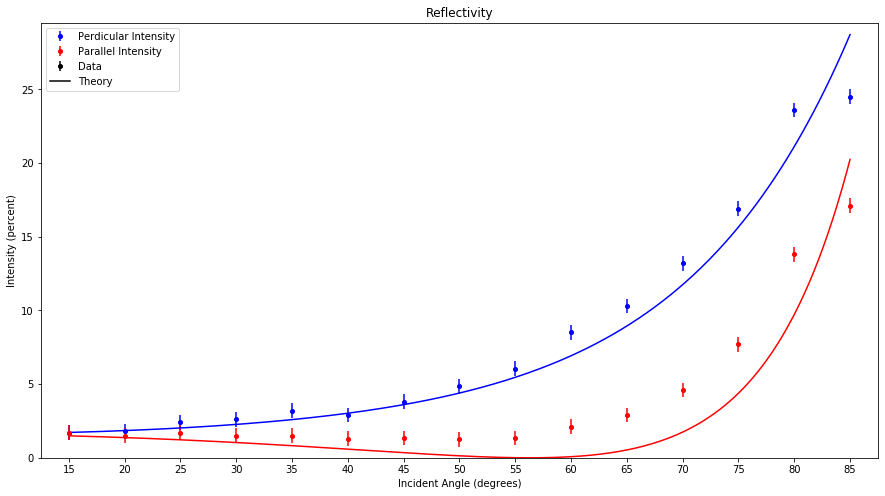

In [84]:
data = pd.read_excel("Lab7Data.xlsx", sheet_name = f"Sheet1")
angle = data["angle"][0:15]
Iperp = data["Ivertical"][0:15]
Ipar = data["Ihorizontal"][0:15]

n = 1.5
def perp(incident, a, b):
    refraction = np.arcsin(1 / n * np.sin(incident))
    return a * ( (np.cos(incident) - n*np.cos(refraction)) / (np.cos(incident) + n*np.cos(refraction)) )**2 + b*0

def par(incident, a, b):
    refraction = np.arcsin(1 / n * np.sin(incident))
    return a * ( (n*np.cos(incident) - np.cos(refraction)) / (n*np.cos(incident) + np.cos(refraction)) )**2 + b*0

angle_synth = np.linspace(min(angle), max(angle), 500)

initialParameters = [20, 3]
finalParameters, parCov = curve_fit(perp, angle*np.pi/180, Iperp, sigma = None, p0=initialParameters, absolute_sigma=False)
a_perp, b_perp = finalParameters

finalParameters, parCov = curve_fit(par, angle*np.pi/180, Ipar, sigma = None, p0=initialParameters, absolute_sigma=False)
a_par, b_par = finalParameters

perp_synth = perp(angle_synth * np.pi / 180, a_perp, b_perp)
par_synth = par(angle_synth * np.pi / 180, a_par, b_par)

error = [0.5 for i in Ipar]

fig, ax = plt.subplots(figsize = (15,8))

p1 = ax.errorbar(angle, Iperp, error, None, marker = 'o', color = "blue", linestyle = '', 
    label = "Perdicular Intensity", ms = 4, elinewidth = 1.5)
p2 = ax.errorbar(angle, Ipar, error, None, marker = 'o', color = "red", linestyle = '', 
    label = "Parallel Intensity", ms = 4, elinewidth = 1.5)

t1, = ax.plot(angle_synth, perp_synth, color = "blue")
t2, = ax.plot(angle_synth, par_synth, color = "red")

p3 = ax.errorbar([-500], [-500], .5, None, marker = 'o', color = "black", linestyle = '', 
    label = "Data", ms = 4, elinewidth = 1.5)
t3, = ax.plot([-500], [-500], color = "black", label = "Theory")

ax.set_xlim(min(angle)-2.5, max(angle)+2.5)
ax.set_ylim(0, max(Iperp)+5)

ax.set_xticks([i*5 for i in range(3,18)])

ax.legend(handles=[p1, p2, p3, t3], loc = "upper left")
ax.set_xlabel("Incident Angle (degrees)")
ax.set_ylabel("Intensity (percent)")
ax.set_title("Reflectivity")

n_par, n_perp = 1.5 ,1.5
print(f"a_perp = {a_perp}, n_perp = {n_perp}")
print(f"a_par = {a_par}, n_par = {n_par}")


a_perp = 39.19832277496718, n_perp = 1.5
a_par = 41.04025039314378, n_par = 1.5


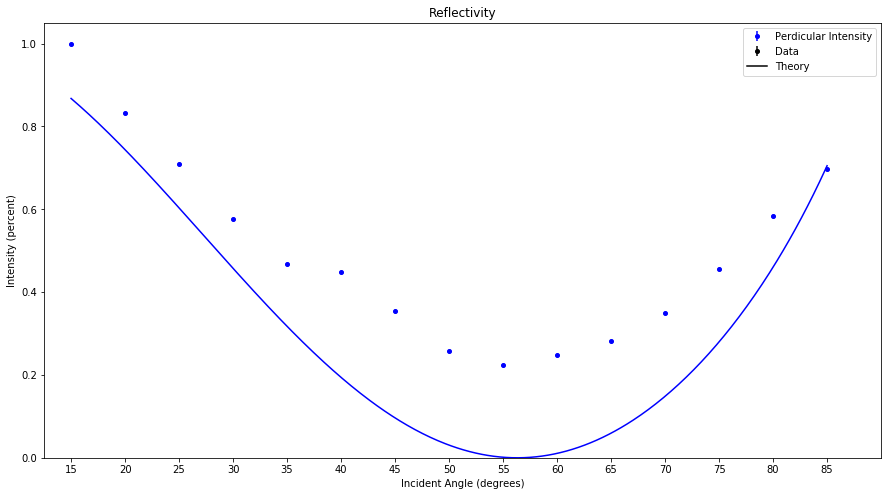

In [92]:
fig, ax = plt.subplots(figsize = (15,8))

ratio = Ipar / Iperp
error = ratio * np.sqrt((error/Iperp)**2 + (error/Ipar)**2)

p1 = ax.errorbar(angle, ratio, error, None, marker = 'o', color = "blue", linestyle = '', 
    label = "Perdicular Intensity", ms = 4, elinewidth = 1.5)
#p2 = ax.errorbar(angle, Ipar, error, None, marker = 'o', color = "red", linestyle = '', 
    #label = "Parallel Intensity", ms = 4, elinewidth = 1.5)

t1, = ax.plot(angle_synth, par_synth / perp_synth, color = "blue")
#t2, = ax.plot(angle_synth, par_synth, color = "red")

p3 = ax.errorbar([-500], [-500], .5, None, marker = 'o', color = "black", linestyle = '', 
    label = "Data", ms = 4, elinewidth = 1.5)
t3, = ax.plot([-500], [-500], color = "black", label = "Theory")

ax.set_xlim(min(angle)-2.5, max(angle)+5)
ax.set_ylim(0, max(Ipar/Iperp)+.05)

ax.set_xticks([i*5 for i in range(3,18)])

ax.legend(handles=[p1, p3, t3], loc = "upper right")
ax.set_xlabel("Incident Angle (degrees)")
ax.set_ylabel("Intensity (percent)")
ax.set_title("Reflectivity")

n_par, n_perp = 1.5 ,1.5
print(f"a_perp = {a_perp}, n_perp = {n_perp}")
print(f"a_par = {a_par}, n_par = {n_par}")

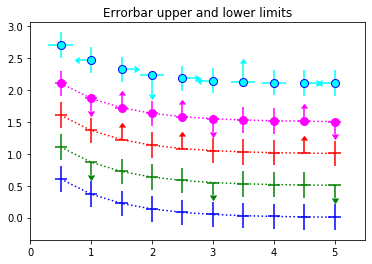

In [29]:
"""
Demo of the errorbar function, including upper and lower limits
"""
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.5, 5.5, 0.5)
y = np.exp(-x)
xerr = 0.1
yerr = 0.2
ls = 'dotted'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# standard error bars
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=ls, color='blue')

# including upper limits
uplims = np.zeros(x.shape)
uplims[[1, 5, 9]] = True
plt.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims, ls=ls,
             color='green')

# including lower limits
lolims = np.zeros(x.shape)
lolims[[2, 4, 8]] = True
plt.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims, ls=ls,
             color='red')

# including upper and lower limits
plt.errorbar(x, y + 1.5, marker='o', ms=8, xerr=xerr, yerr=yerr,
             lolims=lolims, uplims=uplims, ls=ls, color='magenta')

# including xlower and xupper limits
xerr = 0.2
yerr = np.zeros(x.shape) + 0.2
yerr[[3, 6]] = 0.3
xlolims = lolims
xuplims = uplims
lolims = np.zeros(x.shape)
uplims = np.zeros(x.shape)
lolims[[6]] = True
uplims[[3]] = True
plt.errorbar(x, y + 2.1, marker='o', ms=8, xerr=xerr, yerr=yerr,
             xlolims=xlolims, xuplims=xuplims, uplims=uplims, lolims=lolims,
             ls='none', mec='blue', capsize=0, color='cyan')

ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

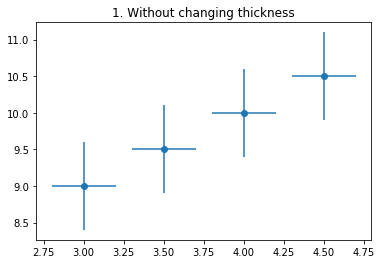

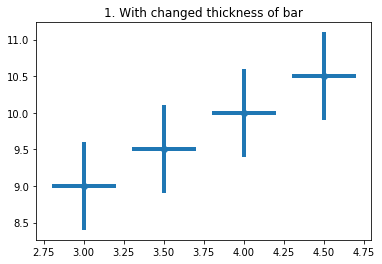

In [39]:
# importing necessary libraries
import matplotlib.pyplot as plt

# example data
x = np.arange(3, 5, 0.5)
y = np.arange(9, 11, 0.5)

# ploting with default thickness of bar
plt.title("1. Without changing thickness")
plt.errorbar(x, y, xerr=0.2, yerr=0.6, fmt='o')
plt.show()

# ploting with changed thickness of bar
plt.title("1. With changed thickness of bar")

# change elinwidth to change the thickness of bar
plt.errorbar(x, y, xerr=0.2, yerr=0.6, fmt='o', elinewidth=4)
plt.show()



In [8]:
def test(x):
    return x*4
def function(func, x5):
    return func(x5)
function(test, 2)

8

In [1]:
import matplotlib.pyplot as plt, matplotlib as mpl, numpy as np
from scipy.integrate import quad as integrate

from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpl_patches

a = 1.
c = 1.
pi = np.pi
s = .3

def gaussian(x, sigma = 1):
    return 1 /(np.sqrt(2*pi)) * np.exp( -(x-a/2)**2/ (2*sigma**2))

def phi_sin(x, n, *args):
    phi = gaussian(x, *args)
    return phi * np.sin(n*pi*x/a)

def psi_sin(x, n, *args):
    psi = 0
    return psi * np.sin(n*pi*x/a)

def An(n, *args):
    integration = integrate(phi_sin, 0, a, args = (n, *args))
    return 2. / a * integration[0]

def Bn(n, *args):
    integration = integrate(psi_sin, 0, a, args = (n, *args))
    return 2. / (n*pi*c) * integration[0]

# integration = integrate(phi_sin, 0, a, args = (1, 2))
# print(integration)

points = 500
x = np.linspace(0, a, points)

times = np.linspace(0, 5, 20)
u = [0 for i in range(len(times))]
for i, t in enumerate(times):
    value = np.zeros(points)
    for m in range(1, 100): 
        value += np.sin(m*pi*x/a) * (An(m, s)*np.cos(m*pi*c*t/a) + Bn(m, s)*np.sin(m*pi*c*t/a))

    u[i] = value
#print(u)

u_array = np.array(u)


# plt.figure(figsize=(15,8))
# plt.plot(x, u[0])
# plt.xlabel("x")
# plt.ylabel("Height")
# plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 8.5)
xdata = []

ln, = ax.plot([], [])

def init():
    ax.set_xlim(0, a)
    ax.set_ylim(np.min(u_array), np.max(u_array))
    return ln

def update(frame):
    ln.set_data(x, u[frame])
    return ln

ani = FuncAnimation(fig, update, frames = range(0, 100), init_func=init, blit=True)

ax.set_xlabel("x")
ax.set_ylabel("Height")
ax.set_title("String Over Time")

plt.show()

Traceback (most recent call last):
  File "/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    for a in self._drawn_artists:
TypeError: 'Line2D' object is not iterable


<Figure size 850x850 with 1 Axes>

In [6]:
len(x)

500